In [1]:
import pickle
import os
from time import sleep
from hyperopt import fmin, tpe, hp, anneal, Trials,space_eval
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRIALS_FOLDER = 'C:/Users/raghu/Desktop/HM/trials/'

In [3]:
space={'boosting_type': hp.choice('boosting_type', ['gbdt','dart','goss']),
   'stopwords_type': hp.choice('stopwords_type', [True,False,]),
   'classifier_type': hp.choice('classifier_type', ['MultiOutputClassifier','ClassifierChain','OneVsRestClassifier']),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'feature_fraction': hp.uniform('feature_fraction', 0.5, 1),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1), #alias "subsample"
    'min_data_in_leaf': hp.qloguniform('min_data_in_leaf', 0, 6, 1),
    'lambda_l1': hp.choice('lambda_l1', [0, hp.loguniform('lambda_l1_positive', -16, 2)]),
    'lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('lambda_l2_positive', -16, 2)]),
    'min_child_weight': hp.loguniform('min_child_weight', -16, 5), #also aliases to min_sum_hessian
    'n_estimators': hp.quniform('n_estimators', 100, 10000, 1),
    }

In [4]:
loaded_fnames = []
trials = Trials()
for fname in os.listdir(TRIALS_FOLDER):
    num_fnmae = int(fname.split('.pkl')[0])
    if num_fnmae in loaded_fnames:
        continue
    print(os.path.join(TRIALS_FOLDER, fname))
    trials_obj = pickle.load(open(os.path.join(TRIALS_FOLDER, fname), 'rb'))

    n_trials = trials_obj['n']
    trials_obj = trials_obj['trials']
    sleep(0.1)
    trials.insert_trial_docs(trials_obj.trials[-n_trials:])
    trials.refresh()
    for i in range(len(trials.trials)):
        trials.trials[i]['tid'] = i
        trials.trials[i]['misc']['tid'] = i
        for key,val in trials.trials[i]['misc']['idxs'].items():
            if len(val) != 0:
                trials.trials[i]['misc']['idxs'][key] = [i]

C:/Users/raghu/Desktop/HM/trials/0.pkl
C:/Users/raghu/Desktop/HM/trials/102457.pkl
C:/Users/raghu/Desktop/HM/trials/33157.pkl
C:/Users/raghu/Desktop/HM/trials/33170.pkl
C:/Users/raghu/Desktop/HM/trials/33605.pkl
C:/Users/raghu/Desktop/HM/trials/34016.pkl
C:/Users/raghu/Desktop/HM/trials/34650.pkl
C:/Users/raghu/Desktop/HM/trials/34751.pkl
C:/Users/raghu/Desktop/HM/trials/67807.pkl
C:/Users/raghu/Desktop/HM/trials/68032.pkl
C:/Users/raghu/Desktop/HM/trials/69300.pkl


In [5]:
space_eval(space, trials.argmin)

{'bagging_fraction': 0.6420902047138992,
 'boosting_type': 'gbdt',
 'classifier_type': 'ClassifierChain',
 'feature_fraction': 0.8446510552520715,
 'lambda_l1': 0,
 'lambda_l2': 9.186418120461479e-05,
 'learning_rate': 0.09809430007963742,
 'min_child_weight': 5.547101487472323e-05,
 'min_data_in_leaf': 7.0,
 'n_estimators': 3284.0,
 'num_leaves': 53.0,
 'stopwords_type': True,
 'subsample_for_bin': 160000.0}

In [6]:
tid_list = []
t_loss = []
for tr in trials.trials:
    tid_list.append(tr['tid'])
    t_loss.append(tr['result']['loss'])

tid_list = np.array(tid_list)
t_loss = np.array(t_loss)

In [9]:
new_loss = t_loss[np.where(t_loss != None)[0]]

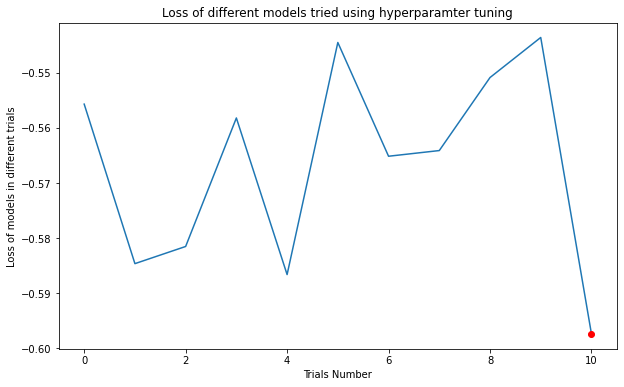

In [13]:
plt.figure(figsize=(10,6))
plt.plot(new_loss)
plt.plot(new_loss.argmin(),new_loss.min(),'ro')
plt.xlabel('Trials Number')
plt.ylabel('Loss of models in different trials')
plt.title('Loss of different models tried using hyperparamter tuning')
plt.show()